In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [28]:
model_features = pd.read_csv("../data/model_features.csv")
del model_features["Unnamed: 0"]
model_features

,total_no_success,total_success,total_calls_count,diff_most_least_recent_call,average_time_between_calls,attended_event,email_click,email_open,form_fill,known_web_visit,...,most_recent_event_week,most_recent_event_day,least_recent_event_week,least_recent_event_day,most_recent_call_week,most_recent_call_day,most_recent_call_hour,least_recent_call_week,least_recent_call_day,least_recent_call_hour
0,-0.560453,0.578170,-0.522164,-0.668751,-0.513000,-0.096309,-0.271085,-0.456960,-0.409389,-0.150886,...,34,20,34,20,34,20,12,34,20,12
1,-0.481787,-0.625634,-0.522164,-0.668751,-0.513000,-0.096309,-0.271085,-0.456960,0.562751,-0.385207,...,41,10,41,10,41,10,9,41,10,9
2,0.068877,-0.625634,0.027966,-0.185202,-0.211148,-0.096309,-0.271085,-0.456960,-0.409389,0.317757,...,32,5,31,1,34,19,15,31,1,23
3,-0.167122,0.578170,-0.129214,-0.445553,-0.327227,-0.096309,-0.271085,-0.456960,-0.409389,-0.150886,...,47,23,47,23,49,3,18,48,25,14
4,-0.481787,-0.625634,-0.522164,-0.668751,-0.513000,-0.096309,0.175354,-0.456960,0.562751,-0.150886,...,45,6,45,6,45,6,15,45,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22086,-0.403120,-0.625634,-0.443574,-0.668333,-0.511956,-0.096309,-0.271085,-0.456960,-0.409389,-0.150886,...,50,13,50,13,51,19,10,51,19,9
22087,-0.088455,0.578170,-0.050624,1.928822,1.340160,-0.096309,1.961109,-0.456960,-1.381530,-0.385207,...,44,31,13,27,46,11,20,32,8,23
22088,0.226209,-0.625634,0.185146,-0.043989,-0.200998,-0.096309,-0.271085,-0.456960,-0.409389,-0.150886,...,25,20,25,20,30,24,18,27,1,22
22089,0.698207,-0.625634,0.656686,0.372611,-0.187969,-0.096309,-0.271085,-0.456960,0.562751,1.020720,...,32,9,31,31,38,16,15,32,9,14


# Data Visualization 

In [33]:

cols = ['most_recent_event', 'total_activity_count', 'most_recent_call_dayofweek',\
          'average_time_between_calls', 'average_time_between_event', 'successful_call']
sns.pairplot(model_features[cols],hue='picked_up_call', height=1.5);



KeyError: "['successful_call', 'most_recent_call_dayofweek', 'most_recent_event', 'job_level'] not in index"

### Key Takeaways from the Pairplot
 1. people with more activity with 6Sense is more likely to be predicted as success
 2. people with more events with 6Sense is more likely to be predicted as success

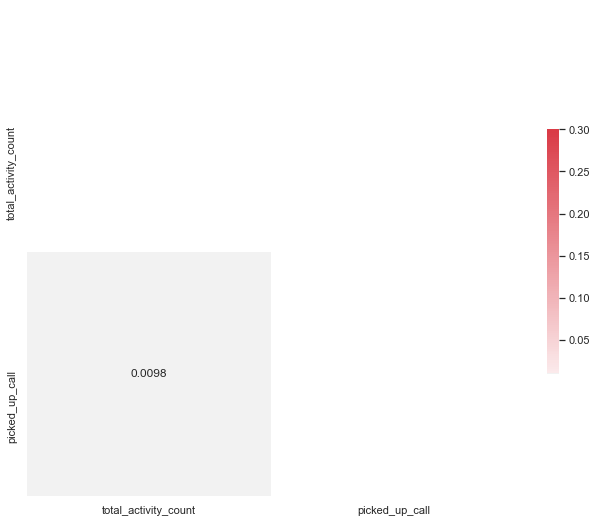

In [31]:
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
sns.set(style="white")
df1 = merged_data[cols]
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});